##Word Embeddings for Hinglish Dataset

Loading and preprocessing the dataset

In [42]:
#downloading train dataset
!wget https://raw.githubusercontent.com/NirantK/Hinglish/master/data/processed/train-large.json

--2020-09-24 07:39:46--  https://raw.githubusercontent.com/NirantK/Hinglish/master/data/processed/train-large.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3211303 (3.1M) [text/plain]
Saving to: ‘train-large.json.1’

train-large.json.1  100%[===================>]   3.06M  13.5MB/s    in 0.2s    

2020-09-24 07:39:46 (13.5 MB/s) - ‘train-large.json.1’ saved [3211303/3211303]



In [43]:
import pandas as pd

In [44]:
# json to dataframe
training_dataset=pd.read_json("train-large.json")

In [45]:
training_dataset

,sentiment,text,uid,lang
0,neutral,RT @ UAAPconfessions Love looks good on Maddie...,8,en
1,neutral,Ye Ye ..... ye ??????? We gonna start another ...,12,en
2,neutral,@ zWffFY9JGklElA1 @ Min _ Of _ Lyching @ thaku...,14,en
3,negative,~ Caring . ~ Bohot Jyada Caring . ~ Courier wa...,23,id
4,positive,@ AliHZaidiPTI @ SarfarazA _ 54 What nonesense...,24,tl
...,...,...,...,...
16995,negative,@ rohitsharmawpg @ asadowaisi @ narendramodi W...,44673,en
16996,negative,@ Prof _ Hariom @ JKgrievance Who is BIJLI man...,45085,en
16997,negative,@ amjedmbt @ bandisanjay _ bjp @ cpkarimnagar ...,45096,id
16998,negative,@ Sunju _ Mishra To phir bjp ke leader vikas k...,45164,sq


In [46]:
import re
preptext=[]
for ind in training_dataset.index:
    #removing @usernames from tweets
    preptext.append( re.sub('@ [^\s]+','',training_dataset.text[ind]))

In [47]:
preptext

['RT  Love looks good on Maddie !!! Ako lang ba yung sobrang masaya kasi may zolo sya ? Before with the past Z medyo lowkey s …  ',
 'Ye Ye ..... ye ??????? We gonna start another June on a sour note ? Uhhhh yes no yes ...... no ( yes )  ',
 '  _ Of _ Lyching    Mein kahna nae chahta qki mere Yaha btay … https // tco / JWSdvvomt8  ',
 '~ Caring . ~ Bohot Jyada Caring . ~ Courier wale bsdk ke sign bhi khud hi krlete h mera .  ',
 '  _ 54 What nonesense ... Kabhi baymani per bani team kamiyab nahi ho sakti ... Jo log apnay liy … https // t . co / al1WFCUTYy  ',
 ' Best of luck  sir World Cup ke liye bhot bhot subhkamnaye  ',
 'Yes . Great dialogues in that one . Also Chupke Chupke over Chhaddabeshi . All except R . G . V . Ke Sholay -) https // t . co / MHCBkX0SnG  ',
 ' Desh bhakti baat wahi samajh sakte hai jo khud deshbhakt Wo log to sirf Bharat tere tukde hong … https // t co / rMdZSiwSGT  ',
 'Pakistani team ne 105 % effort ki Aagey Allah ki marziiiiiiiiiiiii 😩😫😖😣\U0001f97a # PAKvWI

In [48]:
def remove_emoji(string):
    """returns the string without emojis"""
    # storing all available emojis in emoji_pattern
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [49]:
for i in range(len(preptext)):
    # Some of the text has urls in the end of the text. So remove them by 
    # splitting based on the occurence of https
    if "https" in preptext[i]:
        preptext[i]=preptext[i].split("https")[0]
    # removing emojis
    preptext[i]=remove_emoji(preptext[i])
    #removing extra white spaces
    preptext[i]=preptext[i].strip()
    preptext[i]=preptext[i].lower()  

In [50]:
preptext

['rt  love looks good on maddie !!! ako lang ba yung sobrang masaya kasi may zolo sya ? before with the past z medyo lowkey s …',
 'ye ye ..... ye ??????? we gonna start another june on a sour note ? uhhhh yes no yes ...... no ( yes )',
 '_ of _ lyching    mein kahna nae chahta qki mere yaha btay …',
 '~ caring . ~ bohot jyada caring . ~ courier wale bsdk ke sign bhi khud hi krlete h mera .',
 '_ 54 what nonesense ... kabhi baymani per bani team kamiyab nahi ho sakti ... jo log apnay liy …',
 'best of luck  sir world cup ke liye bhot bhot subhkamnaye',
 'yes . great dialogues in that one . also chupke chupke over chhaddabeshi . all except r . g . v . ke sholay -)',
 'desh bhakti baat wahi samajh sakte hai jo khud deshbhakt wo log to sirf bharat tere tukde hong …',
 'pakistani team ne 105 % effort ki aagey allah ki marziiiiiiiiiiiii  # pakvwi # wivpak # cwc19 # wehavewewill',
 '_ nsharif  kiya tum apne baap ki oulad nahi .?? kyun usy bay yaro madadgar chora hua . kiya wo t …',
 'are tu 

In [51]:
# adding a column Processed text to our dataframe
training_dataset['Processed text']=preptext

In [52]:
training_dataset.tail()

,sentiment,text,uid,lang,Processed text
16995,negative,@ rohitsharmawpg @ asadowaisi @ narendramodi W...,44673,en,what a shame what a shame na kro yeh narendra ...
16996,negative,@ Prof _ Hariom @ JKgrievance Who is BIJLI man...,45085,en,_ hariom who is bijli mantri people dont pay ...
16997,negative,@ amjedmbt @ bandisanjay _ bjp @ cpkarimnagar ...,45096,id,_ bjp musalman ke naam pe kalank …
16998,negative,@ Sunju _ Mishra To phir bjp ke leader vikas k...,45164,sq,_ mishra to phir bjp ke leader vikas ke bare m...
16999,negative,@ kunalkamra88 @ Swamy39 ISS ko @ BJP4India wa...,45220,id,iss ko wale doglepan i alawa kuch bhi nahi ka...


In [53]:
#reseting the indexes of dataframe
training_dataset=training_dataset.reset_index()

In [54]:
def remove_punctuations_and_special_characters(text):
    """returns string without punctuations and special characters"""
    text = re.sub(r"[^a-zA Z0-9]","",text)
    return text
training_dataset['Processed text']=training_dataset['Processed text'].apply(remove_punctuations_and_special_characters)

In [55]:
training_dataset

,index,sentiment,text,uid,lang,Processed text
0,0,neutral,RT @ UAAPconfessions Love looks good on Maddie...,8,en,rt love looks good on maddie ako lang ba yun...
1,1,neutral,Ye Ye ..... ye ??????? We gonna start another ...,12,en,ye ye ye we gonna start another june on a so...
2,2,neutral,@ zWffFY9JGklElA1 @ Min _ Of _ Lyching @ thaku...,14,en,of lyching mein kahna nae chahta qki mere...
3,3,negative,~ Caring . ~ Bohot Jyada Caring . ~ Courier wa...,23,id,caring bohot jyada caring courier wale bs...
4,4,positive,@ AliHZaidiPTI @ SarfarazA _ 54 What nonesense...,24,tl,54 what nonesense kabhi baymani per bani tea...
...,...,...,...,...,...,...
16468,16995,negative,@ rohitsharmawpg @ asadowaisi @ narendramodi W...,44673,en,what a shame what a shame na kro yeh narendra ...
16469,16996,negative,@ Prof _ Hariom @ JKgrievance Who is BIJLI man...,45085,en,hariom who is bijli mantri people dont pay b...
16470,16997,negative,@ amjedmbt @ bandisanjay _ bjp @ cpkarimnagar ...,45096,id,bjp musalman ke naam pe kalank
16471,16998,negative,@ Sunju _ Mishra To phir bjp ke leader vikas k...,45164,sq,mishra to phir bjp ke leader vikas ke bare me...


Word embeddings

In [56]:
import gensim  # library to train word embedding

In [57]:
training_corpus = training_dataset['Processed text'].apply(lambda x: x.split(" "))
# training the Word2Vec model on our corpus
model = gensim.models.Word2Vec(sentences=training_corpus) 

In [58]:
# vocabulary of our trained model
model.wv.vocab 

{'rt': <gensim.models.keyedvectors.Vocab at 0x7f3f2039bf60>,
 '': <gensim.models.keyedvectors.Vocab at 0x7f3f1ee42cf8>,
 'love': <gensim.models.keyedvectors.Vocab at 0x7f3f725a8da0>,
 'looks': <gensim.models.keyedvectors.Vocab at 0x7f3f725a8e10>,
 'good': <gensim.models.keyedvectors.Vocab at 0x7f3f725a8e48>,
 'on': <gensim.models.keyedvectors.Vocab at 0x7f3f725a87b8>,
 'ako': <gensim.models.keyedvectors.Vocab at 0x7f3f725a87f0>,
 'lang': <gensim.models.keyedvectors.Vocab at 0x7f3f725a8828>,
 'ba': <gensim.models.keyedvectors.Vocab at 0x7f3f725a8860>,
 'yung': <gensim.models.keyedvectors.Vocab at 0x7f3f725a8898>,
 'kasi': <gensim.models.keyedvectors.Vocab at 0x7f3f725a88d0>,
 'may': <gensim.models.keyedvectors.Vocab at 0x7f3f725a8908>,
 'before': <gensim.models.keyedvectors.Vocab at 0x7f3f725a8940>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7f3f725a8978>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f3f725a89b0>,
 'past': <gensim.models.keyedvectors.Vocab at 0x7f3f725a89e8>,
 '

In [59]:
# word embedding of word 'duniya'
model.wv['duniya']

array([-3.87370527e-01,  9.01840329e-02,  5.82932159e-02,  1.25772446e-01,
        7.84084387e-03, -1.57715455e-01,  4.85593647e-01,  9.68936980e-02,
       -3.04840922e-01,  3.60265940e-01,  3.25316221e-01,  2.03893962e-03,
       -1.68002933e-01, -1.05609775e-01, -1.40947580e-01,  1.78391397e-01,
        2.11169779e-01,  3.95384938e-01, -2.45429859e-01,  4.69975099e-02,
        1.52219459e-01,  2.31652968e-02,  2.76581347e-01, -1.30176678e-01,
       -3.44516724e-01, -1.71472624e-01, -3.22965473e-01, -3.11716683e-02,
        2.32259095e-01,  2.20190659e-01,  3.44060659e-01,  9.89561230e-02,
       -2.18769059e-01, -2.03353632e-02, -2.57277608e-01,  2.27657825e-01,
        4.87776786e-01,  9.62364972e-02, -1.12474954e+00,  3.60694885e-01,
        4.62917350e-02, -2.54504859e-01, -3.60184610e-01, -6.37623519e-02,
        3.50580662e-01, -1.22081630e-01, -1.50917411e-01,  2.96869665e-01,
        3.51842940e-01,  4.50240761e-01,  7.43654892e-02, -4.86783646e-02,
       -1.07165232e-01,  

In [60]:
# words that have most similar word embeddings to duniya
model.wv.most_similar("duniya")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('vale', 0.9988546371459961),
 ('dhyan', 0.9988307952880859),
 ('dam', 0.9985677599906921),
 ('vaise', 0.9985446929931641),
 ('sach', 0.9983323812484741),
 ('jana', 0.9982481002807617),
 ('samaj', 0.9981815218925476),
 ('wali', 0.9980978965759277),
 ('bechara', 0.9977428913116455),
 ('dene', 0.9977151155471802)]

In [61]:
#vectors of our model
model.wv.vectors

array([[-0.15155952, -0.18821959,  0.39090672, ...,  0.0489703 ,
        -0.25609377,  0.22420824],
       [-0.83470863,  0.25035807, -0.24835657, ..., -0.54171604,
         0.26528162,  0.43892872],
       [-1.1202025 ,  0.20626849, -0.37813497, ..., -0.57156307,
         0.34958136,  0.17106219],
       ...,
       [-0.04900143,  0.01277435, -0.00943418, ..., -0.02813814,
         0.01405213,  0.01642439],
       [-0.03090438,  0.00654046,  0.03258227, ..., -0.0021964 ,
        -0.01578505,  0.00937792],
       [-0.00612861, -0.00261342,  0.06370158, ...,  0.02610299,
        -0.02674753,  0.01230941]], dtype=float32)

In [62]:
# Get a dictionary mapping of the vocab
word_map = {
    word:idx
    for idx,word in enumerate(model.wv.vocab, start=2)   #  each words associated with numbers & enumerate gives words same as dictinary
}
word_map

{'rt': 2,
 '': 3,
 'love': 4,
 'looks': 5,
 'good': 6,
 'on': 7,
 'ako': 8,
 'lang': 9,
 'ba': 10,
 'yung': 11,
 'kasi': 12,
 'may': 13,
 'before': 14,
 'with': 15,
 'the': 16,
 'past': 17,
 'z': 18,
 's': 19,
 'ye': 20,
 'we': 21,
 'gonna': 22,
 'start': 23,
 'another': 24,
 'june': 25,
 'a': 26,
 'note': 27,
 'yes': 28,
 'no': 29,
 'of': 30,
 'mein': 31,
 'kahna': 32,
 'nae': 33,
 'chahta': 34,
 'qki': 35,
 'mere': 36,
 'yaha': 37,
 'bohot': 38,
 'jyada': 39,
 'wale': 40,
 'bsdk': 41,
 'ke': 42,
 'sign': 43,
 'bhi': 44,
 'khud': 45,
 'hi': 46,
 'h': 47,
 'mera': 48,
 '54': 49,
 'what': 50,
 'kabhi': 51,
 'per': 52,
 'bani': 53,
 'team': 54,
 'nahi': 55,
 'ho': 56,
 'sakti': 57,
 'jo': 58,
 'log': 59,
 'apnay': 60,
 'liy': 61,
 'best': 62,
 'luck': 63,
 'sir': 64,
 'world': 65,
 'cup': 66,
 'liye': 67,
 'bhot': 68,
 'subhkamnaye': 69,
 'great': 70,
 'in': 71,
 'that': 72,
 'one': 73,
 'also': 74,
 'chupke': 75,
 'over': 76,
 'all': 77,
 'except': 78,
 'r': 79,
 'g': 80,
 'v': 81,
 'de

Plotting the embeddings

In [63]:
#  retrieving all of the vectors from a trained model
X = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [76]:
#printing our model
print(model)

Word2Vec(vocab=5870, size=100, alpha=0.025)


In [78]:
words = list(model.wv.vocab)
# printing words in the vocab
print(words)

['rt', '', 'love', 'looks', 'good', 'on', 'ako', 'lang', 'ba', 'yung', 'kasi', 'may', 'before', 'with', 'the', 'past', 'z', 's', 'ye', 'we', 'gonna', 'start', 'another', 'june', 'a', 'note', 'yes', 'no', 'of', 'mein', 'kahna', 'nae', 'chahta', 'qki', 'mere', 'yaha', 'bohot', 'jyada', 'wale', 'bsdk', 'ke', 'sign', 'bhi', 'khud', 'hi', 'h', 'mera', '54', 'what', 'kabhi', 'per', 'bani', 'team', 'nahi', 'ho', 'sakti', 'jo', 'log', 'apnay', 'liy', 'best', 'luck', 'sir', 'world', 'cup', 'liye', 'bhot', 'subhkamnaye', 'great', 'in', 'that', 'one', 'also', 'chupke', 'over', 'all', 'except', 'r', 'g', 'v', 'desh', 'bhakti', 'baat', 'wahi', 'samajh', 'sakte', 'hai', 'deshbhakt', 'wo', 'to', 'sirf', 'bharat', 'tere', 'tukde', 'pakistani', 'ne', '105', 'effort', 'ki', 'allah', 'pakvwi', 'wivpak', 'cwc19', 'wehavewewill', 'nsharif', 'kiya', 'tum', 'apne', 'baap', 'kyun', 'usy', 'hua', 't', 'are', 'tu', 'aa', 'rha', 'nhi', 'modi', 'phir', 'se', 'pm', 'ban', 'gya', 'chupchaap', 'aaja', 'sidha', 'mo',

In [64]:
#  creating a 2-dimensional PCA model of the word vectors
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

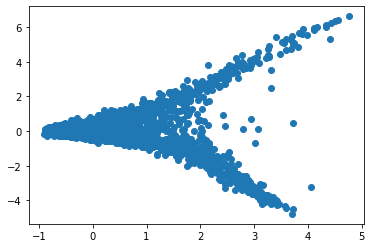

In [65]:
from matplotlib import pyplot
%matplotlib inline
#plotting scatter plot of embeddings
pyplot.scatter(result[:, 0], result[:, 1])

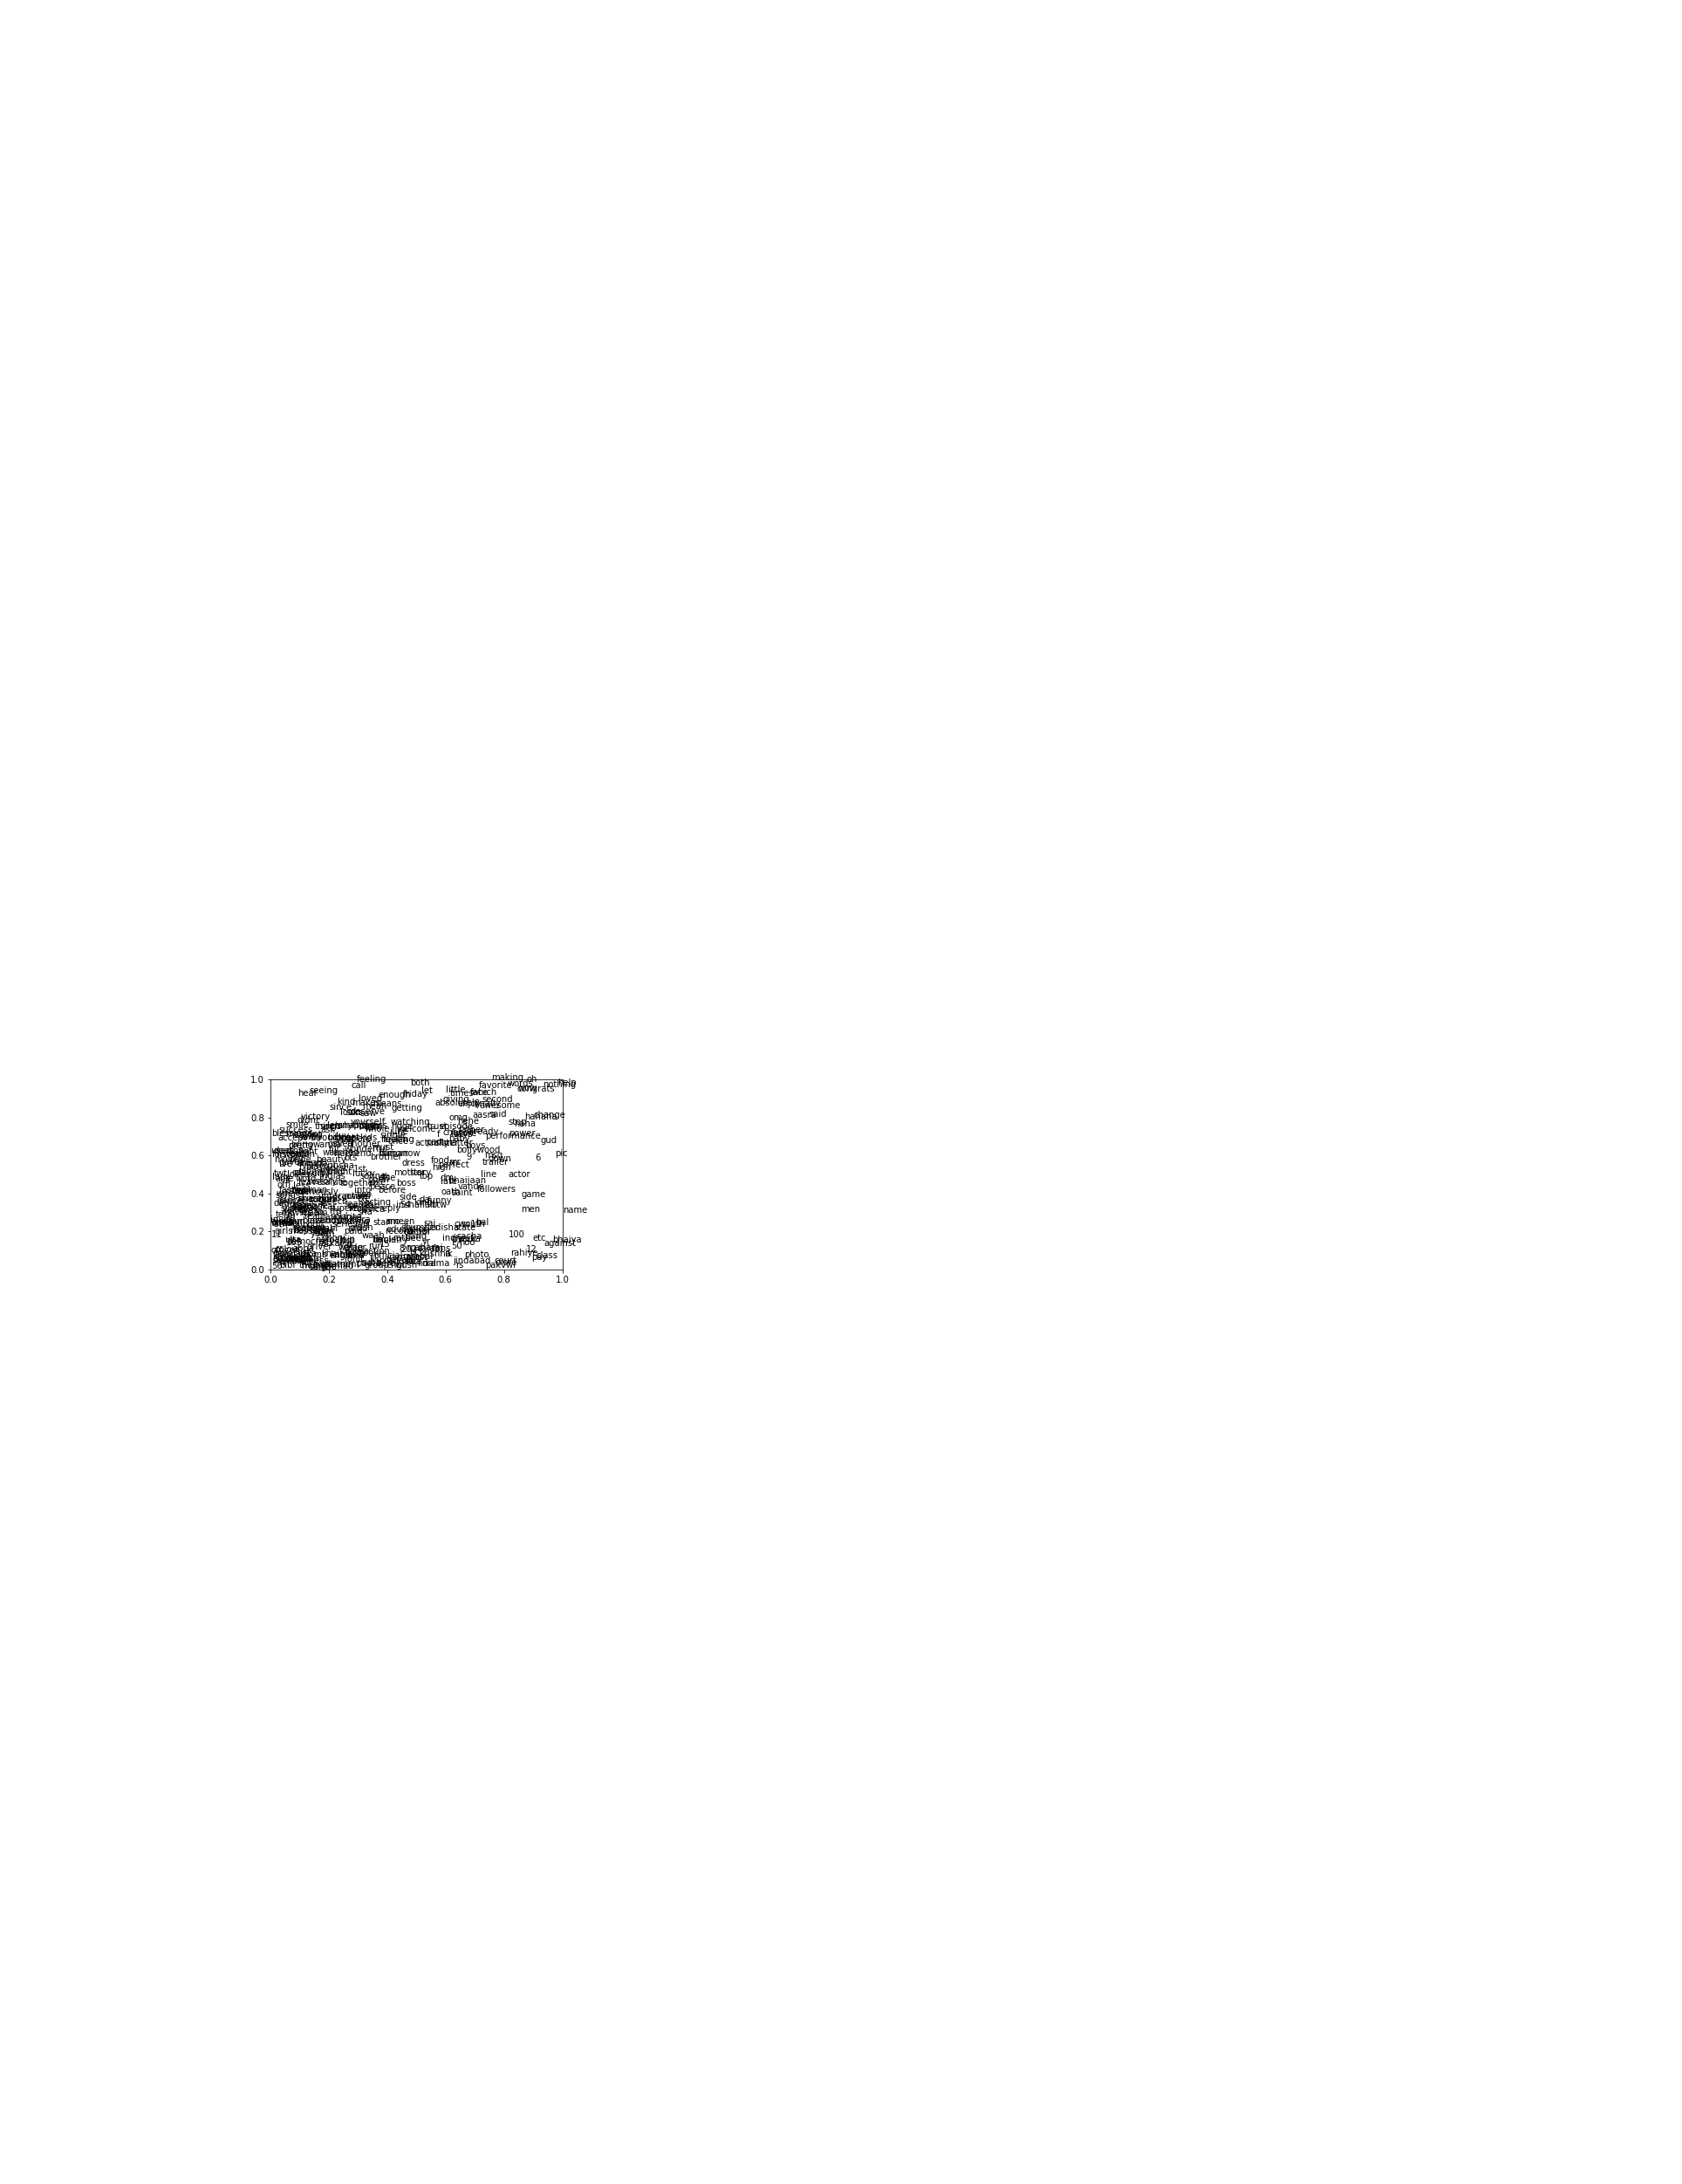

In [66]:
# plotting the words in our vocab on the basis of eord embeddings
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
#saving plot in pdf and png formats    
pyplot.savefig('embeddings.png')
pyplot.savefig('embeddings.pdf')
pyplot.show()

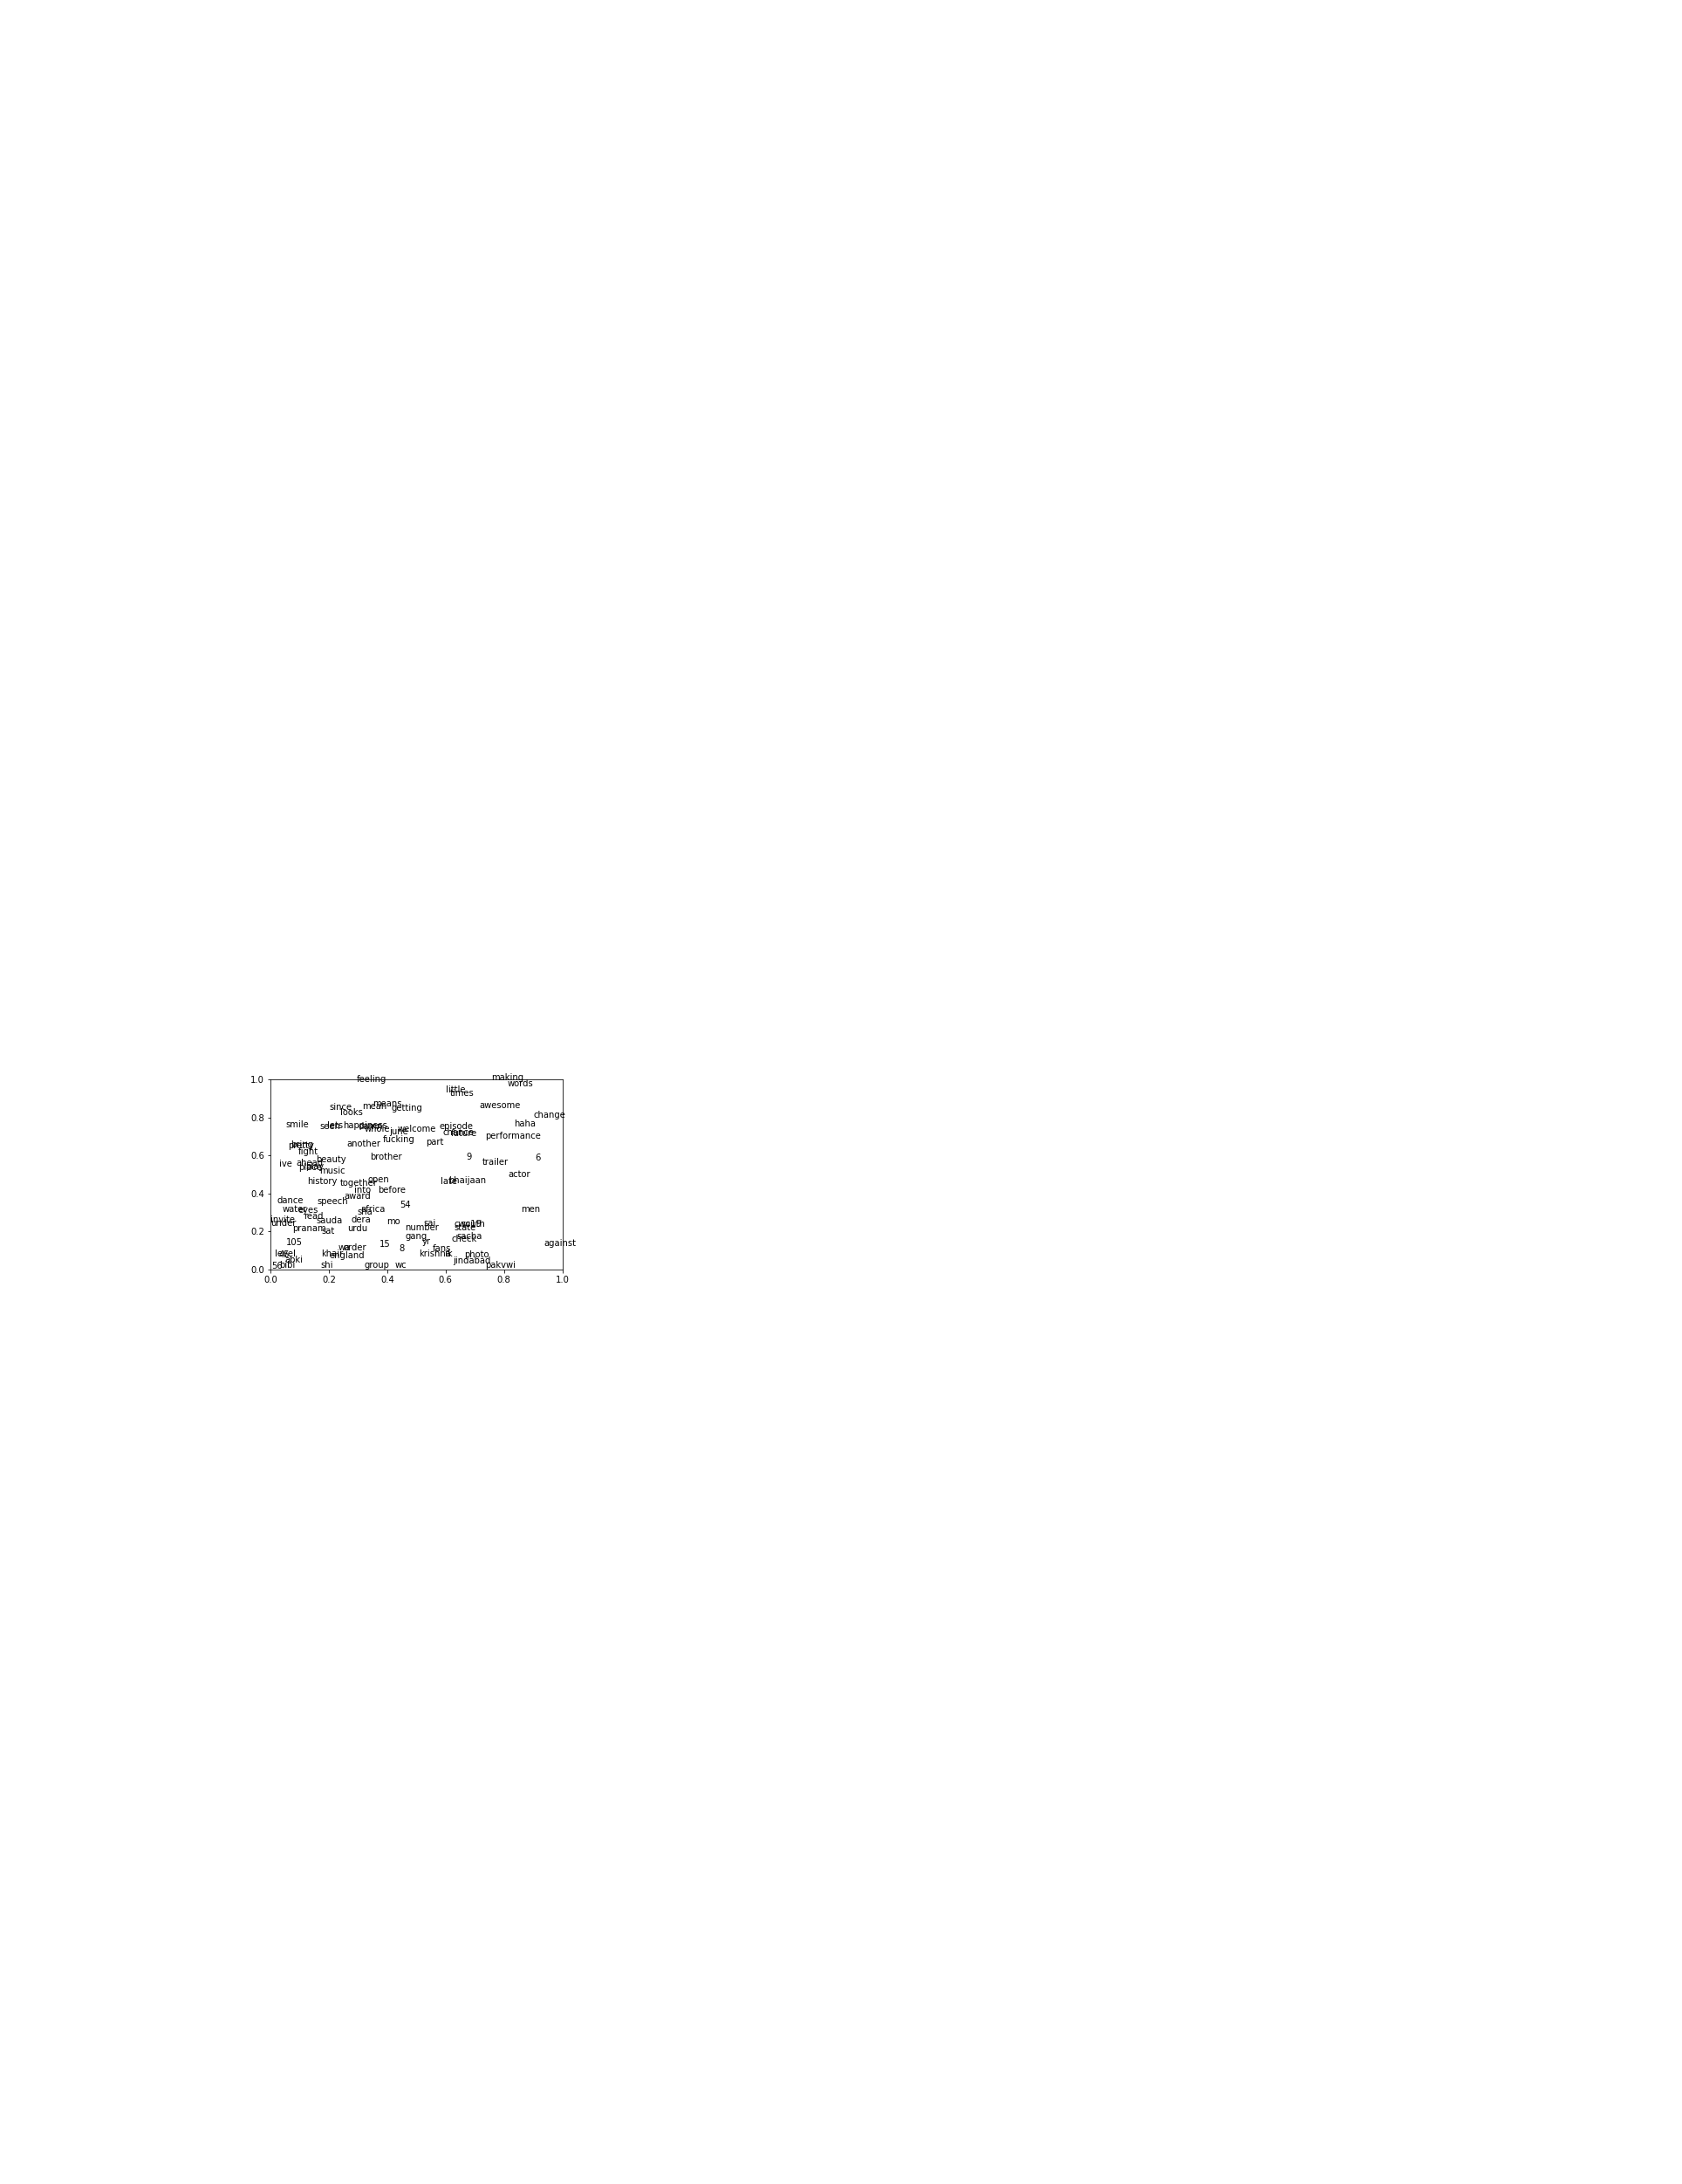

In [67]:
# plotting first 1000 words on the basis of their word embeddings
n=0
for i, word in enumerate(words):
    n+=1
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    if n==1000:
        break
pyplot.savefig('embeddings_1000.png')
pyplot.savefig('embeddings_1000.pdf')
pyplot.show()

In [68]:
#saving the model in binary format
model.wv.save_word2vec_format('model.bin')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [69]:
#saving model in text format
model.wv.save_word2vec_format('model.txt', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
